In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength","fWidth","fSize","fConc","FConcl","fAsym","fMJLog","fMJTrans","fAlpha","fDist","class"]
df=pd.read_csv("./magic-dataset/magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  FConcl     fAsym   fMJLog  fMJTrans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"]=(df["class"]=="g").astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  FConcl     fAsym   fMJLog  fMJTrans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

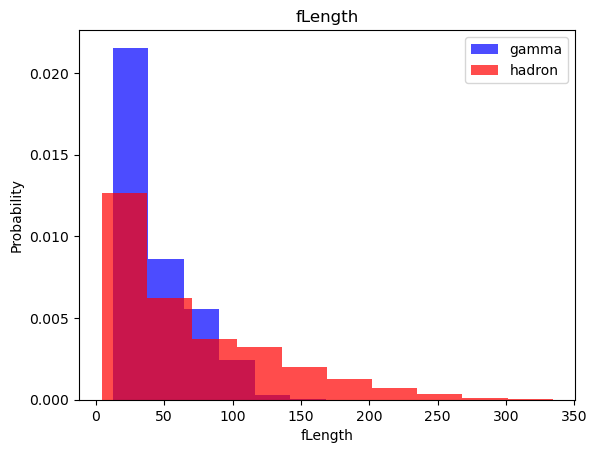

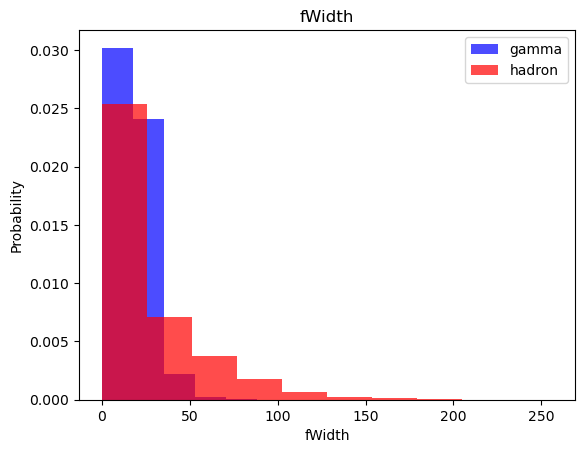

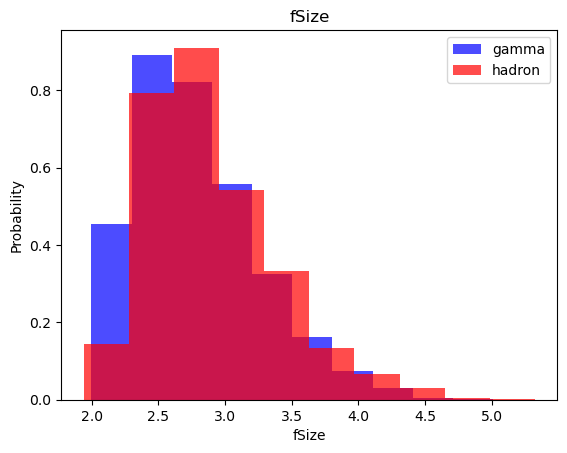

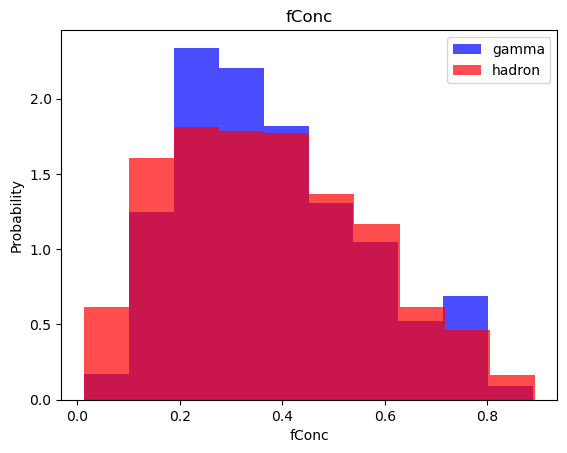

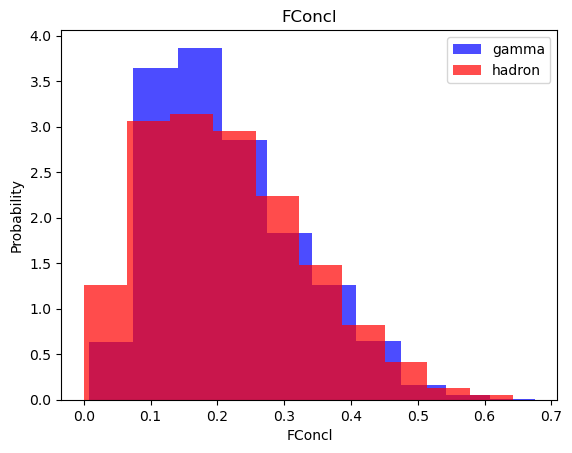

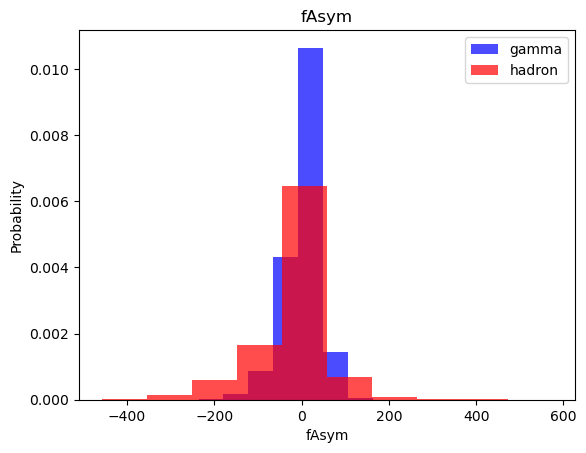

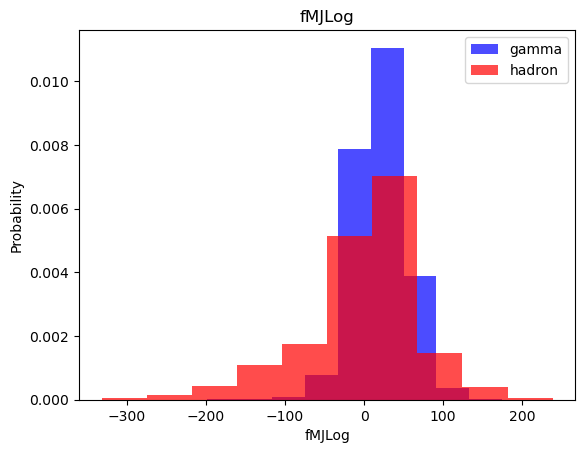

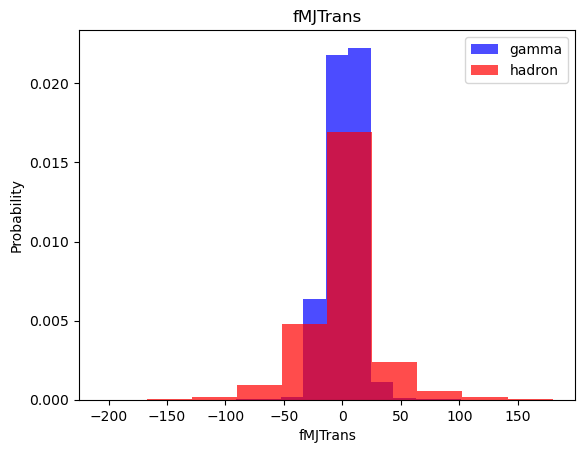

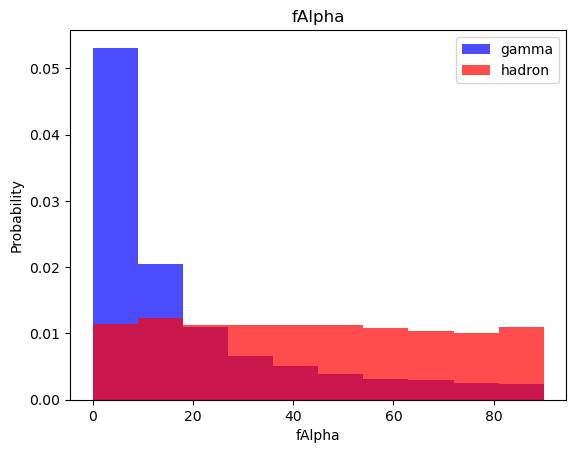

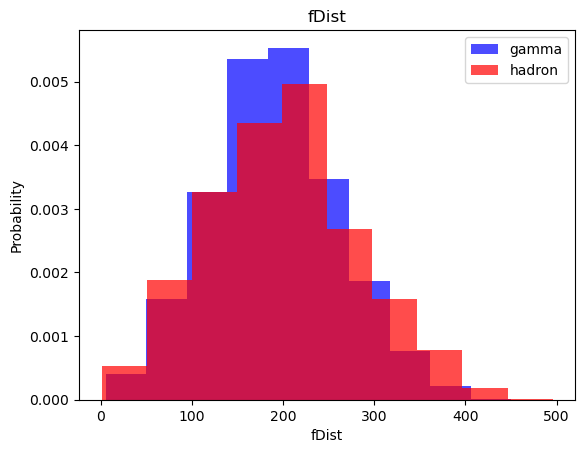

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation,test datasets

In [17]:
train,valid,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [18]:
def scale_dataset(dataframe, oversample=False):
    x= dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X=scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    
    data = np.hstack((X,np.reshape(y,(len(y),1))))
    
    return data,X,y

In [19]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron


7428
3984


In [11]:
train, X_train,y_train = scale_dataset(train, oversample=True)

In [21]:
print(len(X_train))
print(len(y_train))

14856
14856


In [22]:
print(sum(y_train==1))
print(sum(y_train==0))

7428
7428


In [20]:
train, X_train,y_train = scale_dataset(train, oversample=True)
valid, X_valid,y_valid = scale_dataset(valid, oversample=False)
test , X_test ,y_test  = scale_dataset(test , oversample=False)

k-nearest neighbors    anlatıldı

# kNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn_model.predict(X_test)


In [26]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
y_test

array([0, 0, 1, ..., 1, 1, 0])

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1329
           1       0.84      0.88      0.86      2475

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1329
           1       0.86      0.86      0.86      2475

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Bayes Theorem anlatıldı

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [34]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1329
           1       0.73      0.90      0.81      2475

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic regression anlatıldı,
sigmoid function anlatıldı

# Log Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [37]:
y_pred =lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1329
           1       0.85      0.83      0.84      2475

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



Support vector machine anlatıldı, kernel trick anlatıldı

# SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [40]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1329
           1       0.89      0.90      0.90      2475

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural Network den bahsedildi, Activation Function, 

Tensorflow

# Neural Net

In [41]:
import tensorflow as tf

In [74]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [45]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),  # Virgül eklendi
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# optimizer'ın doğru yazımı düzeltildi
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\benak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
)

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8604 - loss: 0.3363 - val_accuracy: 0.7237 - val_loss: 0.5500
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8612 - loss: 0.3247 - val_accuracy: 0.7317 - val_loss: 0.5266
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8672 - loss: 0.3200 - val_accuracy: 0.7471 - val_loss: 0.5083
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8637 - loss: 0.3218 - val_accuracy: 0.7441 - val_loss: 0.5213
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8702 - loss: 0.3125 - val_accuracy: 0.7491 - val_loss: 0.4793
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8727 - loss: 0.3064 - val_accuracy: 0.7564 - val_loss: 0.4645
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8650 - loss: 0.3137 - val_accuracy: 0.7809 - val_loss: 0.4244
Epoch 8/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8668 - loss: 0.3102 - val_accu

In [72]:
# history = nn_model.fit(
#    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0
#)

üsteki iki şey aynı işlemi yapıyor fakat (verbose=0) verbose=eğitim süreci sırasında ekran çıktılarının kontrolünü sağlar

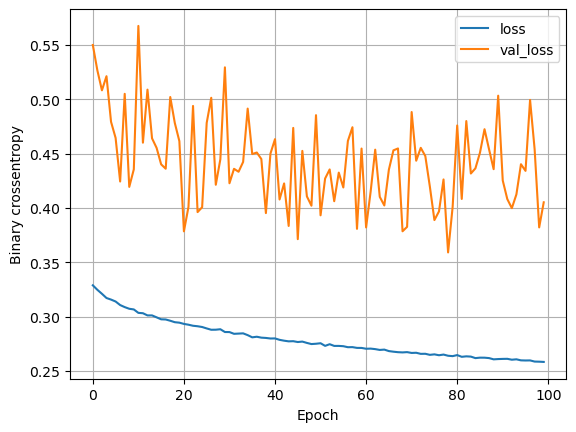

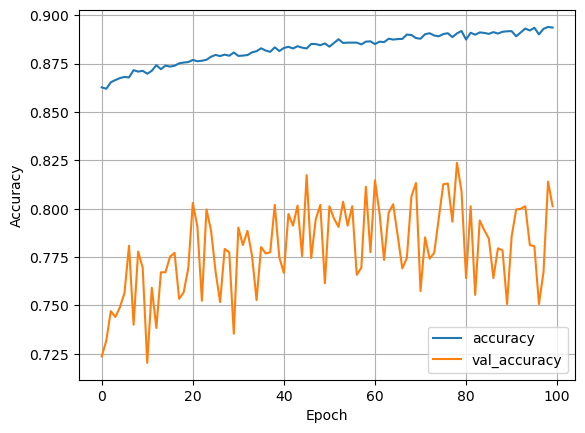

In [75]:
plot_loss(history)
plot_accuracy(history)

In [53]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),  
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),  
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=valid
    )
    
    return nn_model,history

 kodda Dropout katmanları eklenmiş. Dropout, modelin aşırı öğrenmesini engelleyerek daha genel bir model ortaya çıkmasını sağlar. kodda Dropout kullanılmadığı için modelin overfitting yapma olasılığı artar.

In [47]:
def plot_history(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()
    

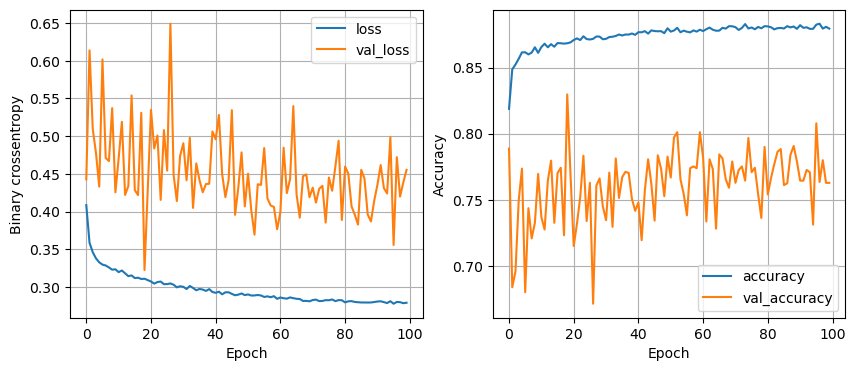

In [50]:
plot_history(history)

16nodes,dropout0,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7835 - loss: 0.4515 - val_accuracy: 0.7059 - val_loss: 0.5793
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8507 - loss: 0.3617 - val_accuracy: 0.6726 - val_loss: 0.5807
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8501 - loss: 0.3504 - val_accuracy: 0.7083 - val_loss: 0.5078
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8524 - loss: 0.3441 - val_accuracy: 0.6841 - val_loss: 0.6720
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8536 - loss: 0.3405 - val_accuracy: 0.7214 - val_loss: 0.5134
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8583 - loss: 0.3275 - val_accuracy: 0.7409 - val_loss: 0.4674
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8578 - loss: 0.3252 - val_accuracy: 0.7810 - val_loss: 0.4174
Epoch 8/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accu

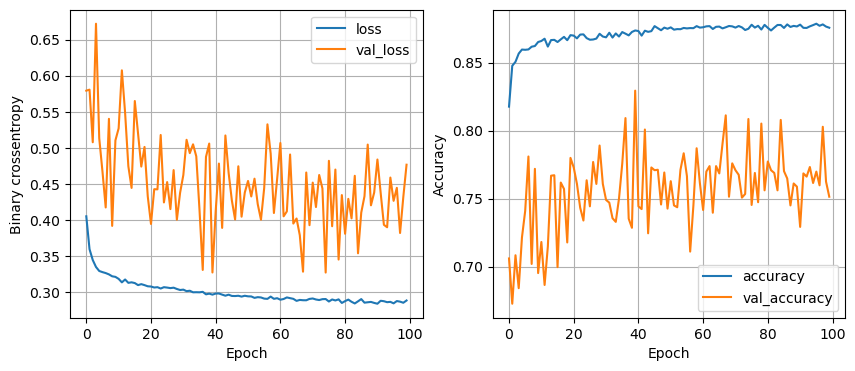

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8693 - loss: 0.3452
16nodes,dropout0,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7581 - loss: 0.4708 - val_accuracy: 0.6326 - val_loss: 0.7439
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8446 - loss: 0.3605 - val_accuracy: 0.7598 - val_loss: 0.4713
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8551 - loss: 0.3422 - val_accuracy: 0.6925 - val_loss: 0.5568
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8528 - loss: 0.3441 - val_accuracy: 0.6793 - val_loss: 0.6364
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8636 - loss: 0.3235 - val_accuracy: 0.7554 - val_loss: 0.4721
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8632 - loss: 0.3179 - val_accuracy: 0.7719 - val_loss: 0.3904
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8623 - loss: 0.3261 - val_accuracy: 0.702

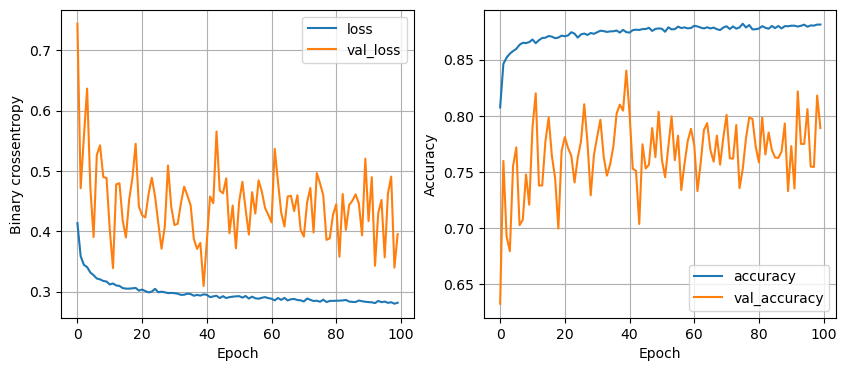

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.3231
16nodes,dropout0,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7424 - loss: 0.5176 - val_accuracy: 0.7204 - val_loss: 0.5762
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8503 - loss: 0.3633 - val_accuracy: 0.7497 - val_loss: 0.4762
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8559 - loss: 0.3485 - val_accuracy: 0.7197 - val_loss: 0.4734
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8514 - loss: 0.3465 - val_accuracy: 0.7557 - val_loss: 0.4753
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8578 - loss: 0.3288 - val_accuracy: 0.7877 - val_loss: 0.4065
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8609 - loss: 0.3280 - val_accuracy: 0.7234 - val_loss: 0.4984
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8642 - loss: 0.3187 - val_accuracy: 0.7517 - val_loss: 0.4

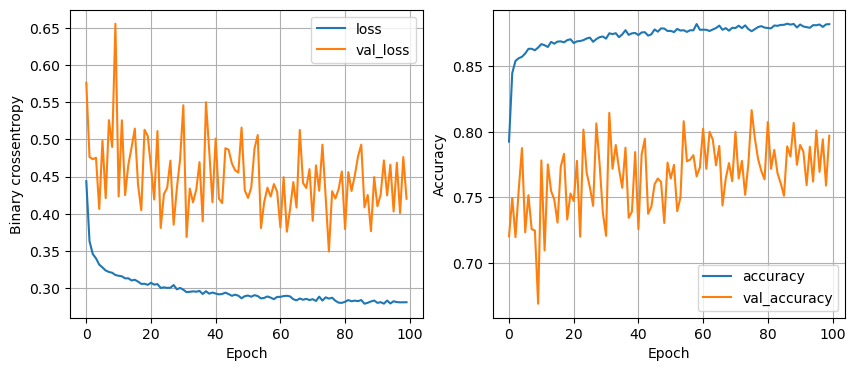

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3020
16nodes,dropout0,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7560 - loss: 0.4827 - val_accuracy: 0.7019 - val_loss: 0.5981
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3651 - val_accuracy: 0.7026 - val_loss: 0.5592
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.3485 - val_accuracy: 0.7450 - val_loss: 0.4614
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3437 - val_accuracy: 0.7096 - val_loss: 0.5734
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3301 - val_accuracy: 0.7409 - val_loss: 0.5022
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3248 - val_accuracy: 0.7217 - val_loss: 0.5001
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.3210 - val_accuracy: 0.7137 - v

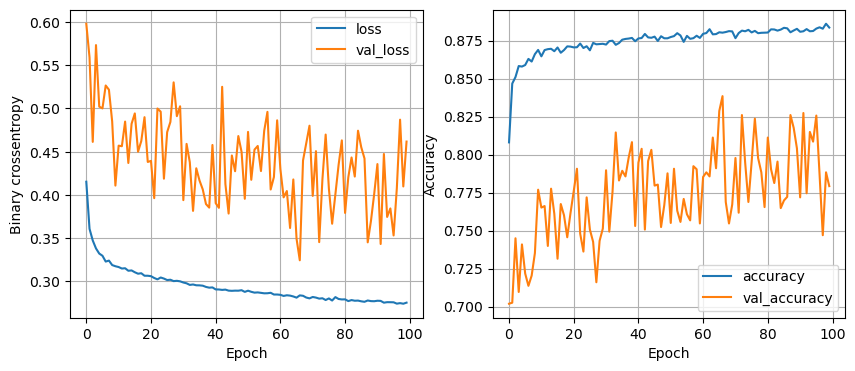

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3161
16nodes,dropout0,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7607 - loss: 0.5006 - val_accuracy: 0.6541 - val_loss: 0.6594
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.3887 - val_accuracy: 0.7150 - val_loss: 0.5641
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8403 - loss: 0.3680 - val_accuracy: 0.7288 - val_loss: 0.5337
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.3503 - val_accuracy: 0.7328 - val_loss: 0.5153
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3353 - val_accuracy: 0.7338 - val_loss: 0.5060
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.3424 - val_accuracy: 0.7608 - val_loss: 0.4720
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.3317 - val_accuracy: 0.7238 - v

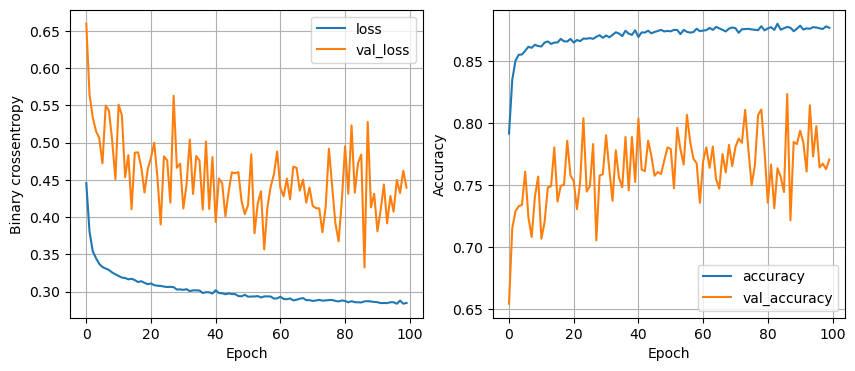

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3150
16nodes,dropout0,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6707 - loss: 0.5964 - val_accuracy: 0.6470 - val_loss: 0.5799
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.3880 - val_accuracy: 0.6494 - val_loss: 0.6466
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.3705 - val_accuracy: 0.7241 - val_loss: 0.5737
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.3618 - val_accuracy: 0.7271 - val_loss: 0.5264
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.3520 - val_accuracy: 0.7672 - val_loss: 0.4532
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.3453 - val_accuracy: 0.7365 - val_loss: 0.5071
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3436 - val_accuracy: 0.7473 - val_loss: 0.49

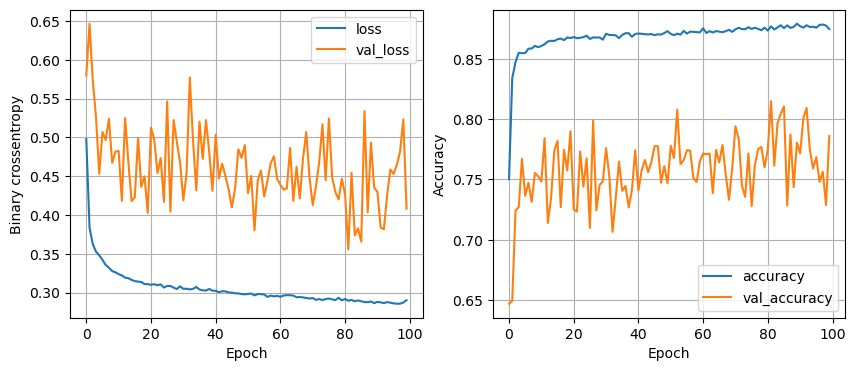

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3193
16nodes,dropout0,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6614 - loss: 0.6297 - val_accuracy: 0.6043 - val_loss: 0.7008
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4290 - val_accuracy: 0.6447 - val_loss: 0.6241
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0.4008 - val_accuracy: 0.6639 - val_loss: 0.6045
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3842 - val_accuracy: 0.6760 - val_loss: 0.5931
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3614 - val_accuracy: 0.7244 - val_loss: 0.5163
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.3627 - val_accuracy: 0.7362 - val_loss: 0.4994
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3523 - val_accuracy: 0.7066 - v

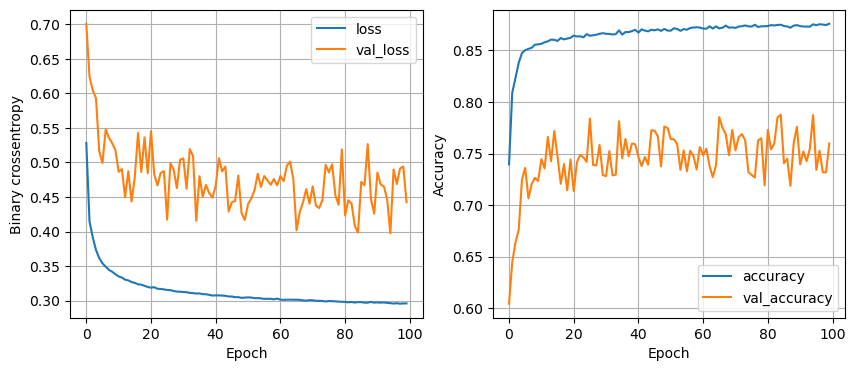

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3045
16nodes,dropout0,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6265 - loss: 0.6635 - val_accuracy: 0.5256 - val_loss: 0.7398
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7921 - loss: 0.4418 - val_accuracy: 0.6410 - val_loss: 0.6119
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8206 - loss: 0.3968 - val_accuracy: 0.6982 - val_loss: 0.5695
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4021 - val_accuracy: 0.6941 - val_loss: 0.5837
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3779 - val_accuracy: 0.7180 - val_loss: 0.5555
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.3732 - val_accuracy: 0.7376 - val_loss: 0.5372
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.3576 - val_accuracy: 0.7396 - v

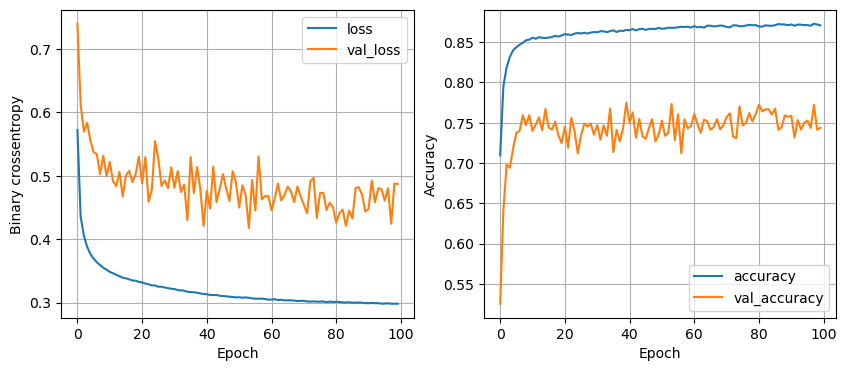

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3113
16nodes,dropout0,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5333 - loss: 0.6676 - val_accuracy: 0.5434 - val_loss: 0.6554
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - loss: 0.4991 - val_accuracy: 0.6107 - val_loss: 0.6340
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4354 - val_accuracy: 0.6332 - val_loss: 0.6144
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8240 - loss: 0.3950 - val_accuracy: 0.6676 - val_loss: 0.5872
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.3865 - val_accuracy: 0.6800 - val_loss: 0.5735
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.3762 - val_accuracy: 0.6834 - val_loss: 0.5900
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8423 - loss: 0.3694 - val_accuracy: 0.6716 - val_loss: 0.60

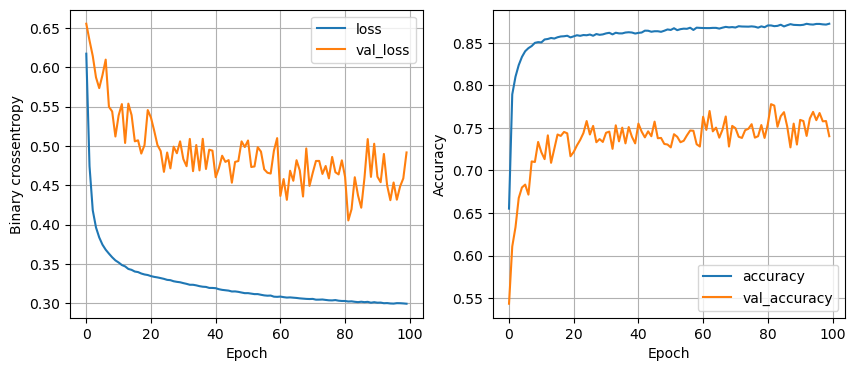

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3093
16nodes,dropout0.2,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7486 - loss: 0.5043 - val_accuracy: 0.6053 - val_loss: 0.6900
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8221 - loss: 0.4119 - val_accuracy: 0.6719 - val_loss: 0.5400
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.3980 - val_accuracy: 0.7096 - val_loss: 0.5049
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3738 - val_accuracy: 0.6800 - val_loss: 0.5867
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.3751 - val_accuracy: 0.7328 - val_loss: 0.4657
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8417 - loss: 0.3700 - val_accuracy: 0.6423 - val_loss: 0.6153
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3680 - val_accuracy: 0.6978 - 

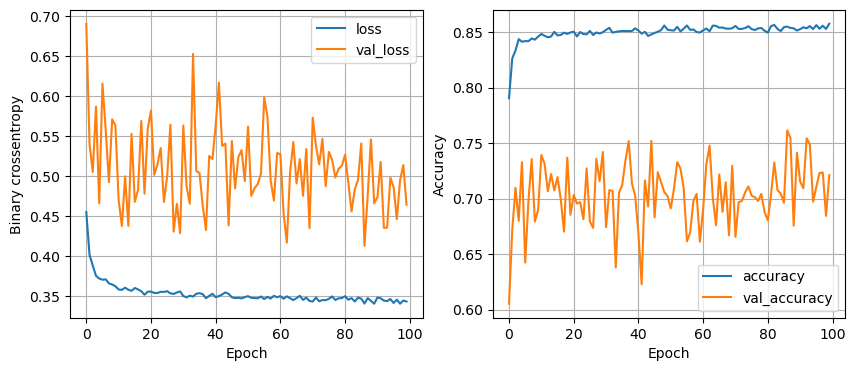

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3101
16nodes,dropout0.2,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7579 - loss: 0.5020 - val_accuracy: 0.5875 - val_loss: 0.7599
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4045 - val_accuracy: 0.7729 - val_loss: 0.4284
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.3785 - val_accuracy: 0.7184 - val_loss: 0.4945
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.3675 - val_accuracy: 0.7493 - val_loss: 0.4835
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3711 - val_accuracy: 0.7026 - val_loss: 0.5313
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3621 - val_accuracy: 0.7090 - val_loss: 0.4898
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3655 - val_accuracy: 0.7258 - 

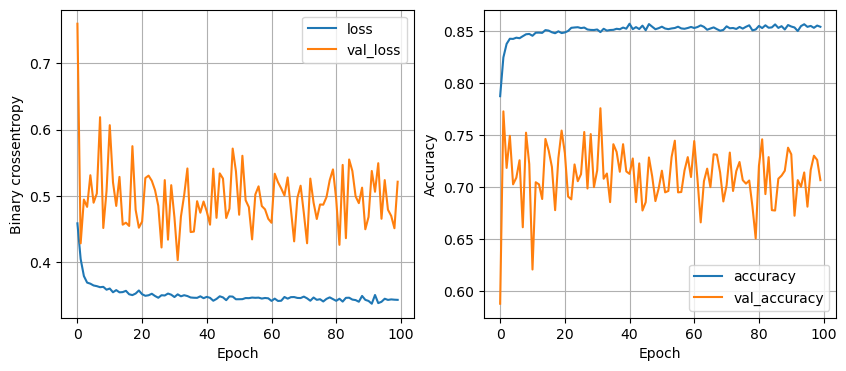

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3123
16nodes,dropout0.2,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7131 - loss: 0.5531 - val_accuracy: 0.6507 - val_loss: 0.6061
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.4283 - val_accuracy: 0.7305 - val_loss: 0.5275
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4047 - val_accuracy: 0.7295 - val_loss: 0.5224
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.3839 - val_accuracy: 0.7315 - val_loss: 0.4931
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.3687 - val_accuracy: 0.6814 - val_loss: 0.5469
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3799 - val_accuracy: 0.6985 - val_loss: 0.5481
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.3634 - val_accuracy: 0.6955 - val_loss: 0.5

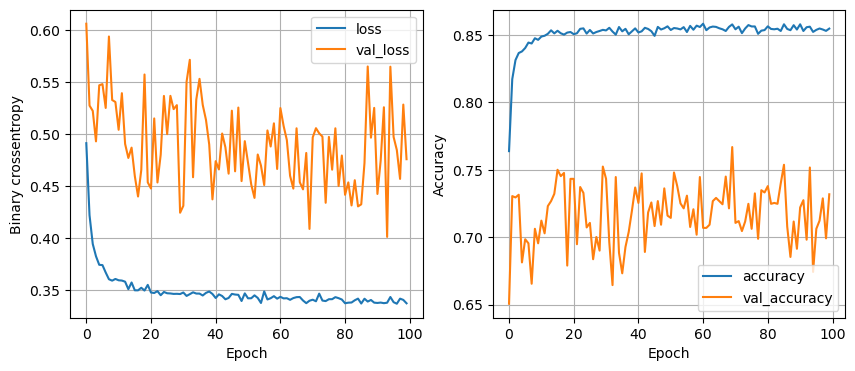

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3091
16nodes,dropout0.2,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7248 - loss: 0.5385 - val_accuracy: 0.6460 - val_loss: 0.6009
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.4005 - val_accuracy: 0.6881 - val_loss: 0.5680
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3824 - val_accuracy: 0.7288 - val_loss: 0.5001
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8382 - loss: 0.3822 - val_accuracy: 0.6941 - val_loss: 0.5291
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.3665 - val_accuracy: 0.7251 - val_loss: 0.5002
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3580 - val_accuracy: 0.7177 - val_loss: 0.5132
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3611 - val_accuracy: 0.6709 -

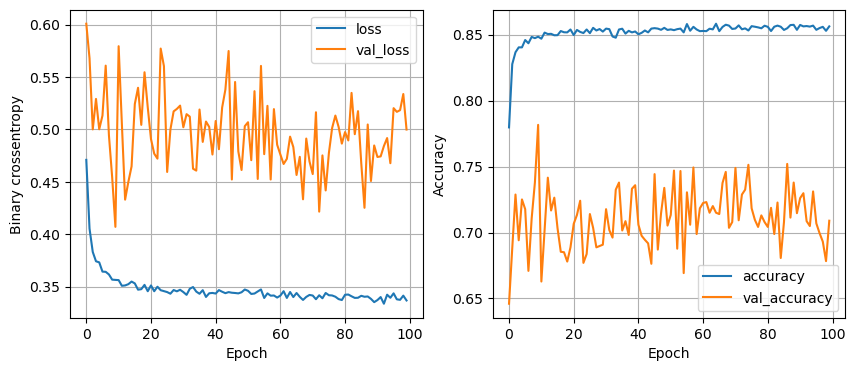

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.3033
16nodes,dropout0.2,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7216 - loss: 0.5561 - val_accuracy: 0.6406 - val_loss: 0.6822
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8077 - loss: 0.4283 - val_accuracy: 0.7059 - val_loss: 0.5907
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.4018 - val_accuracy: 0.6962 - val_loss: 0.5593
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8393 - loss: 0.3741 - val_accuracy: 0.6989 - val_loss: 0.5744
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.3792 - val_accuracy: 0.7298 - val_loss: 0.4957
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.3852 - val_accuracy: 0.7423 - val_loss: 0.5048
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8442 - loss: 0.3661 - val_accuracy: 0.7120 -

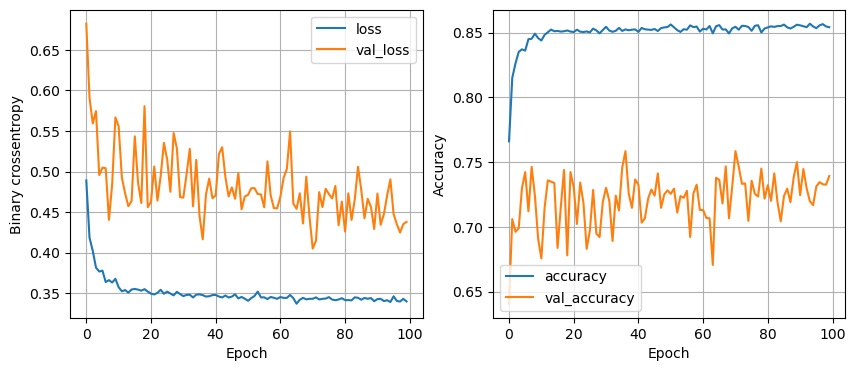

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.3136
16nodes,dropout0.2,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6888 - loss: 0.6099 - val_accuracy: 0.6528 - val_loss: 0.5993
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8021 - loss: 0.4457 - val_accuracy: 0.6894 - val_loss: 0.5740
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4124 - val_accuracy: 0.6655 - val_loss: 0.5822
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8235 - loss: 0.4138 - val_accuracy: 0.6803 - val_loss: 0.6084
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8253 - loss: 0.4053 - val_accuracy: 0.7009 - val_loss: 0.5788
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8380 - loss: 0.3879 - val_accuracy: 0.6901 - val_loss: 0.5727
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8390 - loss: 0.3771 - val_accuracy: 0.7046 - val_loss: 0.

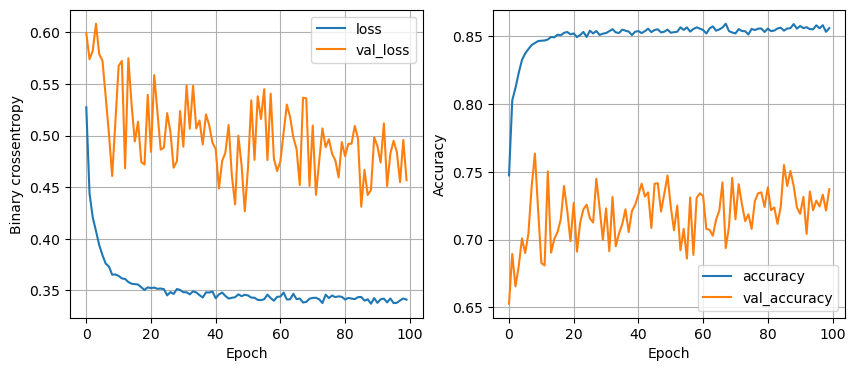

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3110
16nodes,dropout0.2,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6735 - loss: 0.6109 - val_accuracy: 0.6174 - val_loss: 0.6637
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7761 - loss: 0.4749 - val_accuracy: 0.6245 - val_loss: 0.6529
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7917 - loss: 0.4517 - val_accuracy: 0.6417 - val_loss: 0.6207
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4326 - val_accuracy: 0.6507 - val_loss: 0.6266
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.4077 - val_accuracy: 0.7019 - val_loss: 0.5532
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - loss: 0.4120 - val_accuracy: 0.7207 - val_loss: 0.5356
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8220 - loss: 0.4072 - val_accuracy: 0.6901 -

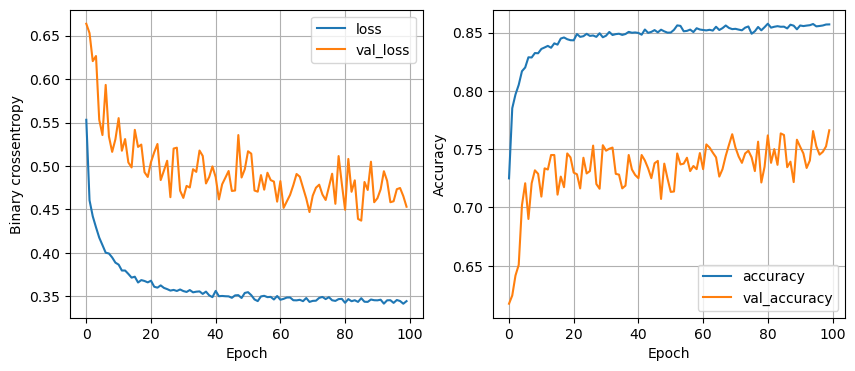

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.3103
16nodes,dropout0.2,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6218 - loss: 0.6306 - val_accuracy: 0.5599 - val_loss: 0.6638
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.4686 - val_accuracy: 0.6090 - val_loss: 0.6476
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.4576 - val_accuracy: 0.6211 - val_loss: 0.6402
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.4506 - val_accuracy: 0.6386 - val_loss: 0.6305
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.4425 - val_accuracy: 0.6423 - val_loss: 0.6223
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4277 - val_accuracy: 0.6753 - val_loss: 0.5868
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4200 - val_accuracy: 0.6679 -

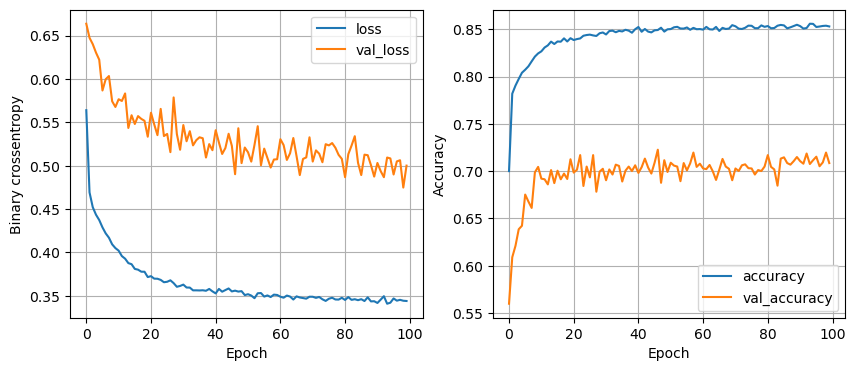

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3092
16nodes,dropout0.2,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4654 - loss: 0.7474 - val_accuracy: 0.4694 - val_loss: 0.7282
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.5636 - val_accuracy: 0.5434 - val_loss: 0.6801
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.4948 - val_accuracy: 0.5841 - val_loss: 0.6562
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4653 - val_accuracy: 0.5986 - val_loss: 0.6410
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4505 - val_accuracy: 0.6369 - val_loss: 0.6188
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4386 - val_accuracy: 0.6457 - val_loss: 0.6160
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4421 - val_accuracy: 0.6639 - val_loss: 0.

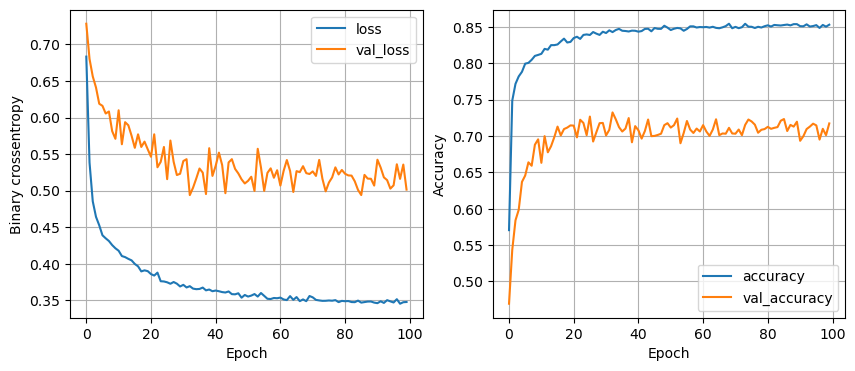

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3149
32nodes,dropout0,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8022 - loss: 0.4317 - val_accuracy: 0.5592 - val_loss: 0.7826
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8506 - loss: 0.3480 - val_accuracy: 0.6827 - val_loss: 0.5664
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3327 - val_accuracy: 0.7133 - val_loss: 0.4916
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3319 - val_accuracy: 0.7194 - val_loss: 0.5121
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3223 - val_accuracy: 0.7184 - val_loss: 0.4861
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.3210 - val_accuracy: 0.7776 - val_loss: 0.4465
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3115 - val_accuracy: 0.7376 - va

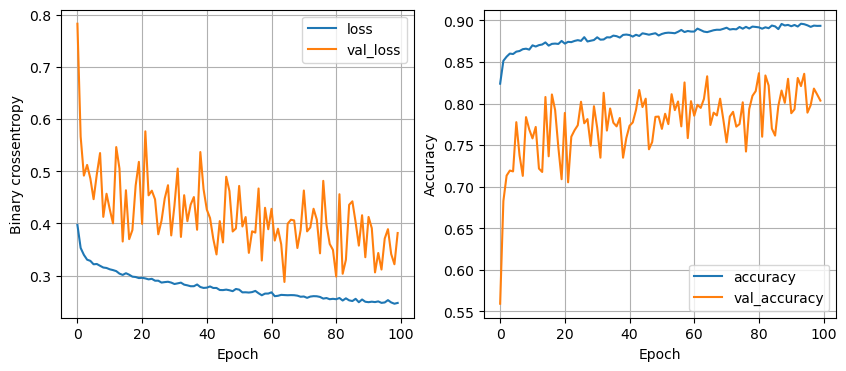

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.4098
32nodes,dropout0,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7847 - loss: 0.4513 - val_accuracy: 0.7204 - val_loss: 0.5095
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3491 - val_accuracy: 0.7480 - val_loss: 0.5042
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3502 - val_accuracy: 0.7715 - val_loss: 0.4230
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.3450 - val_accuracy: 0.7756 - val_loss: 0.4299
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3246 - val_accuracy: 0.7015 - val_loss: 0.5605
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3172 - val_accuracy: 0.7174 - val_loss: 0.5162
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8670 - loss: 0.3205 - val_accuracy: 0.7180 - va

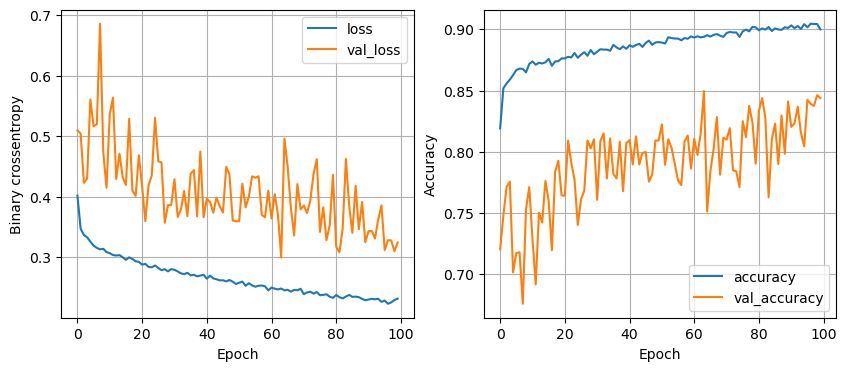

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3716
32nodes,dropout0,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7916 - loss: 0.4547 - val_accuracy: 0.7052 - val_loss: 0.6003
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8515 - loss: 0.3566 - val_accuracy: 0.6975 - val_loss: 0.5698
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3396 - val_accuracy: 0.7793 - val_loss: 0.4187
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3288 - val_accuracy: 0.7170 - val_loss: 0.5314
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3303 - val_accuracy: 0.7658 - val_loss: 0.4524
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8673 - loss: 0.3145 - val_accuracy: 0.7201 - val_loss: 0.5146
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3179 - val_accuracy: 0.7456 - val_loss: 0.459

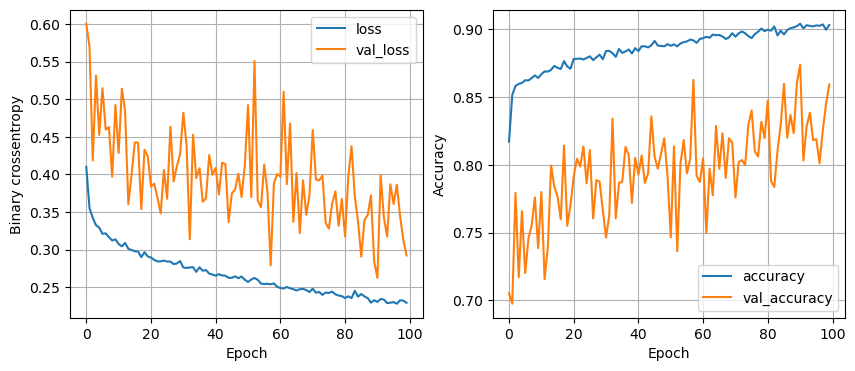

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3712
32nodes,dropout0,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7883 - loss: 0.4583 - val_accuracy: 0.7594 - val_loss: 0.5147
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.3678 - val_accuracy: 0.7850 - val_loss: 0.4368
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3418 - val_accuracy: 0.8052 - val_loss: 0.3656
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.3324 - val_accuracy: 0.7170 - val_loss: 0.5511
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3257 - val_accuracy: 0.8028 - val_loss: 0.3732
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.3194 - val_accuracy: 0.7295 - val_loss: 0.4559
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3174 - val_accuracy: 0.6676 - v

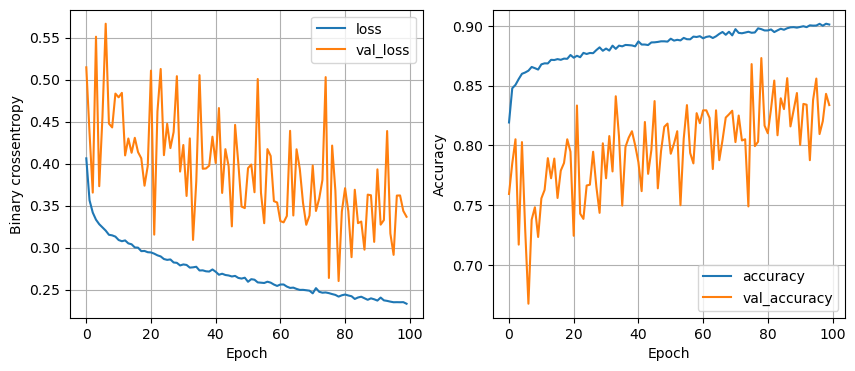

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3597
32nodes,dropout0,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7841 - loss: 0.4666 - val_accuracy: 0.7204 - val_loss: 0.5536
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3479 - val_accuracy: 0.7429 - val_loss: 0.4708
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3321 - val_accuracy: 0.7722 - val_loss: 0.4324
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3330 - val_accuracy: 0.7574 - val_loss: 0.4510
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3269 - val_accuracy: 0.6921 - val_loss: 0.5862
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8577 - loss: 0.3316 - val_accuracy: 0.7113 - val_loss: 0.5053
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3195 - val_accuracy: 0.7944 - v

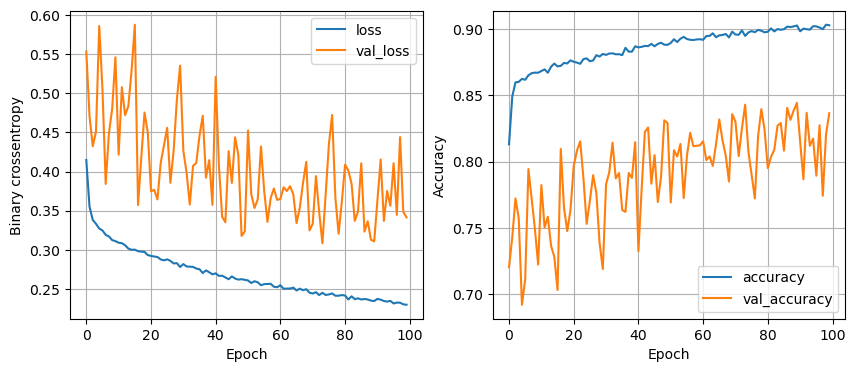

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3710
32nodes,dropout0,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7527 - loss: 0.5126 - val_accuracy: 0.6965 - val_loss: 0.5763
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3774 - val_accuracy: 0.7362 - val_loss: 0.5430
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3384 - val_accuracy: 0.7446 - val_loss: 0.4813
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3336 - val_accuracy: 0.7409 - val_loss: 0.4903
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3321 - val_accuracy: 0.7298 - val_loss: 0.5152
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.3296 - val_accuracy: 0.7732 - val_loss: 0.4344
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.3209 - val_accuracy: 0.7170 - val_loss: 0.53

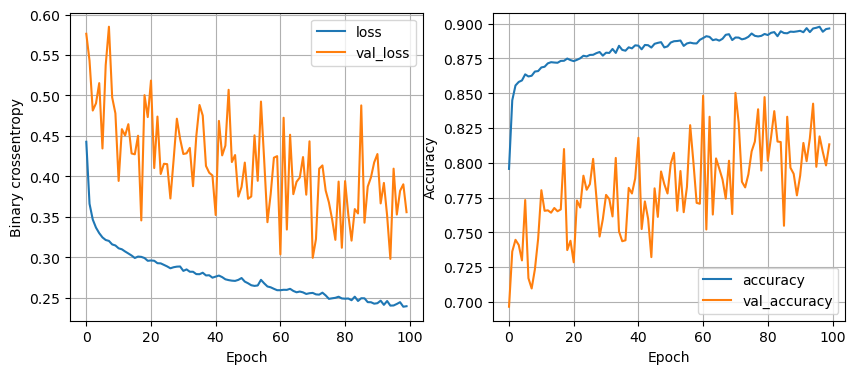

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3368
32nodes,dropout0,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7011 - loss: 0.5536 - val_accuracy: 0.6548 - val_loss: 0.6072
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.3971 - val_accuracy: 0.7463 - val_loss: 0.4970
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.3729 - val_accuracy: 0.7241 - val_loss: 0.5215
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.3614 - val_accuracy: 0.7762 - val_loss: 0.4279
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.3502 - val_accuracy: 0.7079 - val_loss: 0.5427
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3351 - val_accuracy: 0.7601 - val_loss: 0.4636
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.3351 - val_accuracy: 0.7278 - v

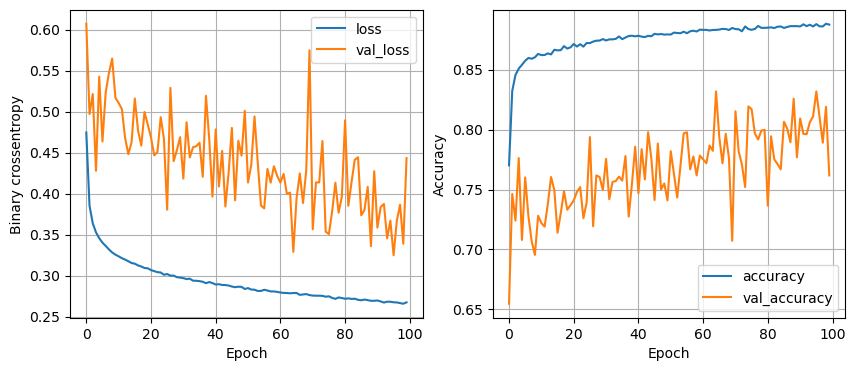

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3117
32nodes,dropout0,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7007 - loss: 0.5810 - val_accuracy: 0.6477 - val_loss: 0.6085
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.3942 - val_accuracy: 0.6803 - val_loss: 0.5817
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3727 - val_accuracy: 0.7164 - val_loss: 0.5288
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3674 - val_accuracy: 0.7557 - val_loss: 0.4846
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3527 - val_accuracy: 0.6985 - val_loss: 0.5744
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.3480 - val_accuracy: 0.7587 - val_loss: 0.4733
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3377 - val_accuracy: 0.7170 - v

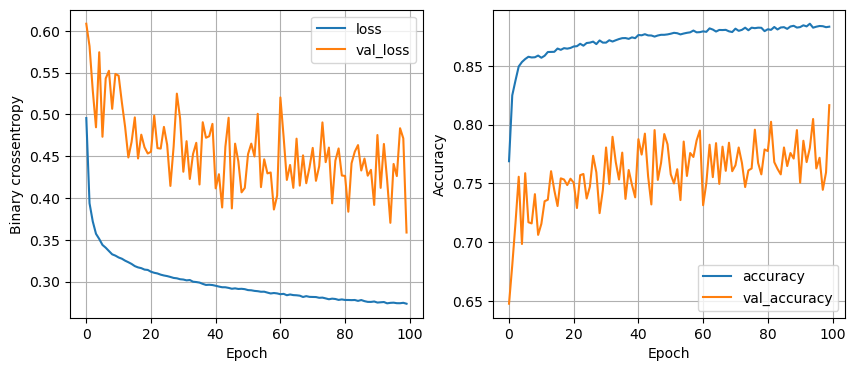

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3047
32nodes,dropout0,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6901 - loss: 0.6247 - val_accuracy: 0.5912 - val_loss: 0.6817
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8024 - loss: 0.4308 - val_accuracy: 0.6319 - val_loss: 0.6179
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.3955 - val_accuracy: 0.6534 - val_loss: 0.6018
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3769 - val_accuracy: 0.7012 - val_loss: 0.5574
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3779 - val_accuracy: 0.7164 - val_loss: 0.5354
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8447 - loss: 0.3635 - val_accuracy: 0.7493 - val_loss: 0.5054
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.3477 - val_accuracy: 0.7651 - val_loss: 0.47

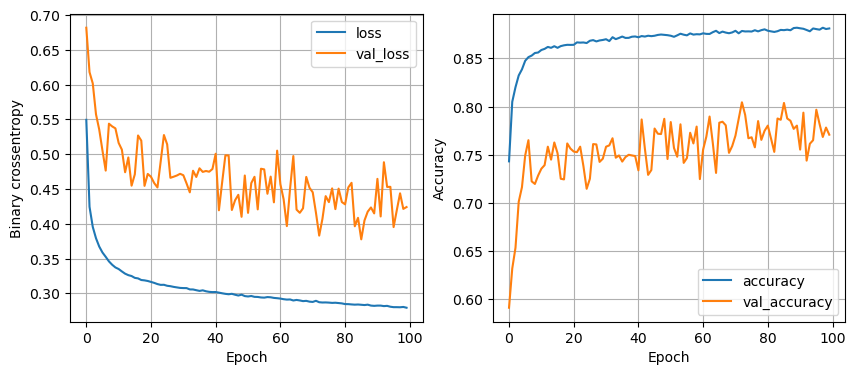

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8695 - loss: 0.3150
32nodes,dropout0.2,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7852 - loss: 0.4619 - val_accuracy: 0.7567 - val_loss: 0.4628
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3775 - val_accuracy: 0.7251 - val_loss: 0.4520
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8489 - loss: 0.3617 - val_accuracy: 0.7009 - val_loss: 0.6165
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.3681 - val_accuracy: 0.6874 - val_loss: 0.5866
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.3585 - val_accuracy: 0.6740 - val_loss: 0.5808
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3529 - val_accuracy: 0.7389 - val_loss: 0.4690
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3393 - val_accuracy: 0.6511 - 

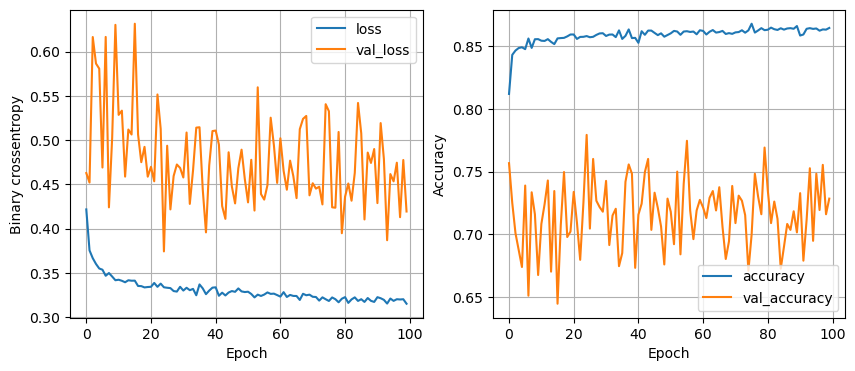

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3167
32nodes,dropout0.2,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7574 - loss: 0.4880 - val_accuracy: 0.6928 - val_loss: 0.5530
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.3866 - val_accuracy: 0.7591 - val_loss: 0.4329
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.3750 - val_accuracy: 0.7362 - val_loss: 0.4817
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3495 - val_accuracy: 0.6978 - val_loss: 0.5309
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3580 - val_accuracy: 0.7315 - val_loss: 0.4988
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.3523 - val_accuracy: 0.6709 - val_loss: 0.6053
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3413 - val_accuracy: 0.7369 - 

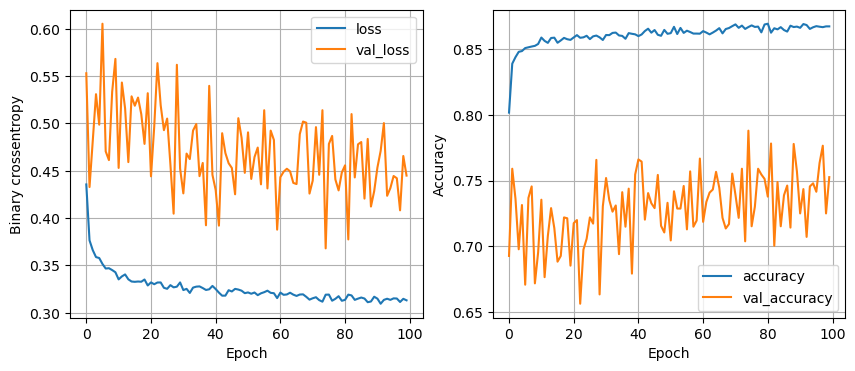

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3045
32nodes,dropout0.2,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7509 - loss: 0.4967 - val_accuracy: 0.7036 - val_loss: 0.5623
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8293 - loss: 0.4038 - val_accuracy: 0.7332 - val_loss: 0.5144
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8428 - loss: 0.3662 - val_accuracy: 0.7507 - val_loss: 0.4643
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.3549 - val_accuracy: 0.7554 - val_loss: 0.4503
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.3584 - val_accuracy: 0.7079 - val_loss: 0.5066
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.3556 - val_accuracy: 0.6837 - val_loss: 0.5299
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3454 - val_accuracy: 0.7278 - val_loss: 0.4

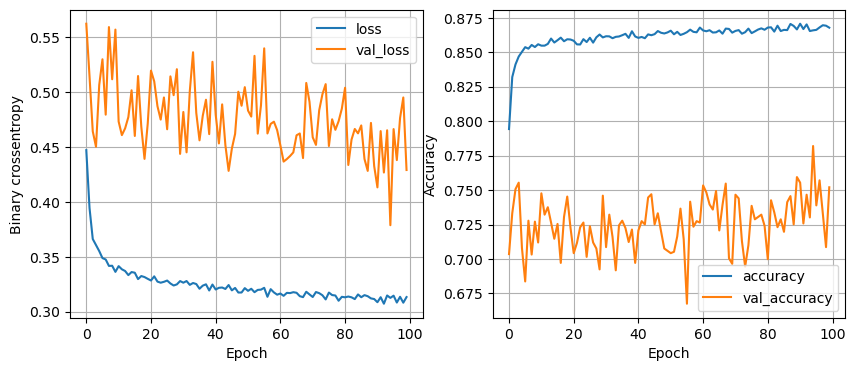

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.3026
32nodes,dropout0.2,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7631 - loss: 0.4880 - val_accuracy: 0.6346 - val_loss: 0.6680
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3941 - val_accuracy: 0.6588 - val_loss: 0.6348
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8376 - loss: 0.3724 - val_accuracy: 0.6814 - val_loss: 0.5773
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3557 - val_accuracy: 0.7460 - val_loss: 0.4557
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8477 - loss: 0.3514 - val_accuracy: 0.7490 - val_loss: 0.4230
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3502 - val_accuracy: 0.7211 - val_loss: 0.4829
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3412 - val_accuracy: 0.6925 -

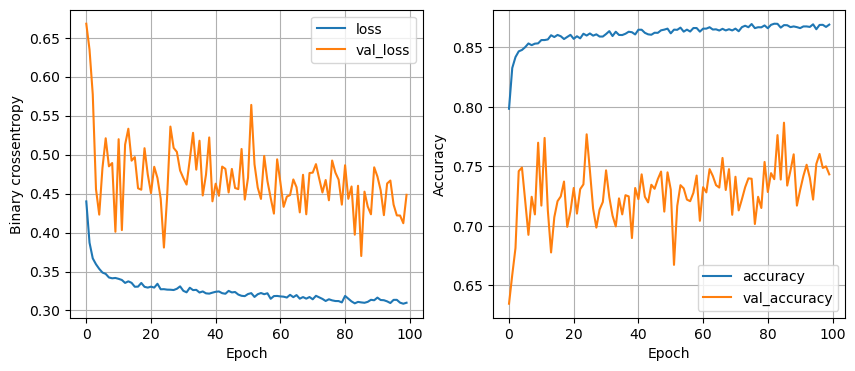

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8800 - loss: 0.2927
32nodes,dropout0.2,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7584 - loss: 0.4954 - val_accuracy: 0.7133 - val_loss: 0.5550
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8283 - loss: 0.3994 - val_accuracy: 0.6692 - val_loss: 0.6337
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.3743 - val_accuracy: 0.7382 - val_loss: 0.4832
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.3647 - val_accuracy: 0.7490 - val_loss: 0.4658
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.3560 - val_accuracy: 0.7248 - val_loss: 0.4826
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.3478 - val_accuracy: 0.7083 - val_loss: 0.5211
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3393 - val_accuracy: 0.7224 -

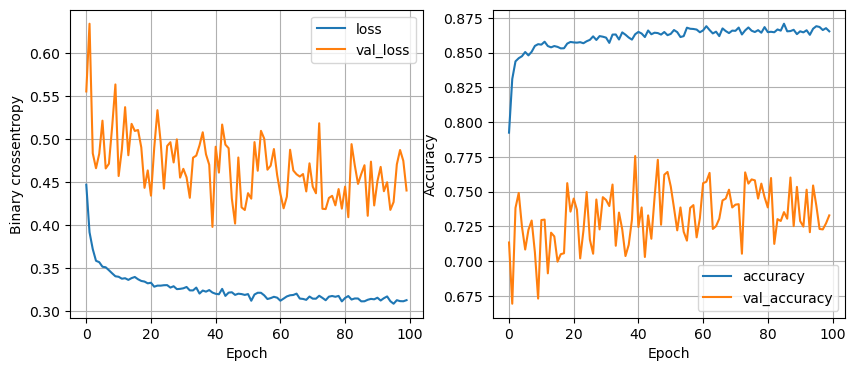

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3042
32nodes,dropout0.2,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7288 - loss: 0.5227 - val_accuracy: 0.6662 - val_loss: 0.5828
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8258 - loss: 0.4106 - val_accuracy: 0.7291 - val_loss: 0.5105
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3920 - val_accuracy: 0.7530 - val_loss: 0.4714
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.3772 - val_accuracy: 0.6861 - val_loss: 0.5684
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8392 - loss: 0.3715 - val_accuracy: 0.6925 - val_loss: 0.5732
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8452 - loss: 0.3605 - val_accuracy: 0.6760 - val_loss: 0.5541
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.3556 - val_accuracy: 0.7557 - val_loss: 0

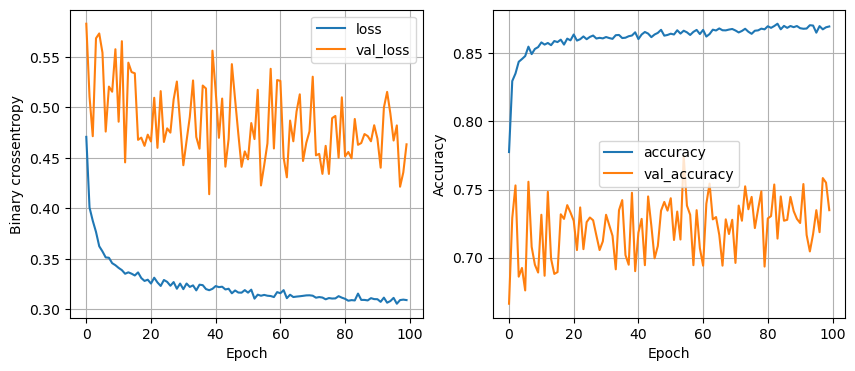

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.2943
32nodes,dropout0.2,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7217 - loss: 0.5522 - val_accuracy: 0.6289 - val_loss: 0.6347
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.4239 - val_accuracy: 0.6454 - val_loss: 0.6090
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4153 - val_accuracy: 0.6995 - val_loss: 0.5635
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.4009 - val_accuracy: 0.7066 - val_loss: 0.5747
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3865 - val_accuracy: 0.7227 - val_loss: 0.5391
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8454 - loss: 0.3736 - val_accuracy: 0.7362 - val_loss: 0.5043
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.3686 - val_accuracy: 0.7281 -

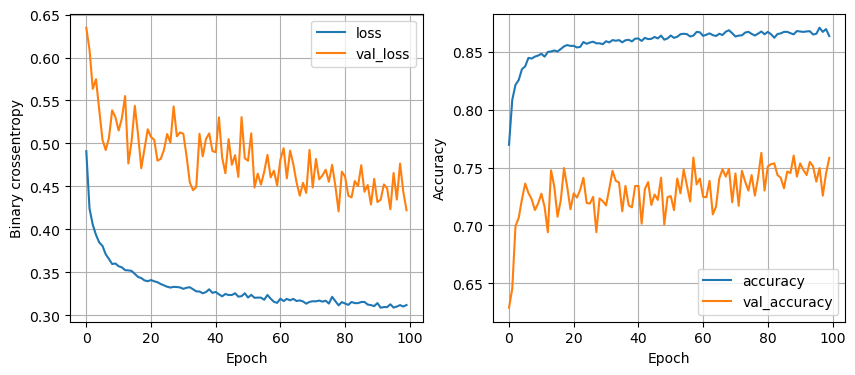

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.2979
32nodes,dropout0.2,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6812 - loss: 0.6019 - val_accuracy: 0.6272 - val_loss: 0.6433
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4381 - val_accuracy: 0.6406 - val_loss: 0.6158
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8095 - loss: 0.4226 - val_accuracy: 0.6901 - val_loss: 0.5668
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.3998 - val_accuracy: 0.6588 - val_loss: 0.6107
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8339 - loss: 0.3911 - val_accuracy: 0.6777 - val_loss: 0.5924
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8368 - loss: 0.3823 - val_accuracy: 0.6982 - val_loss: 0.5565
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.3815 - val_accuracy: 0.7100 -

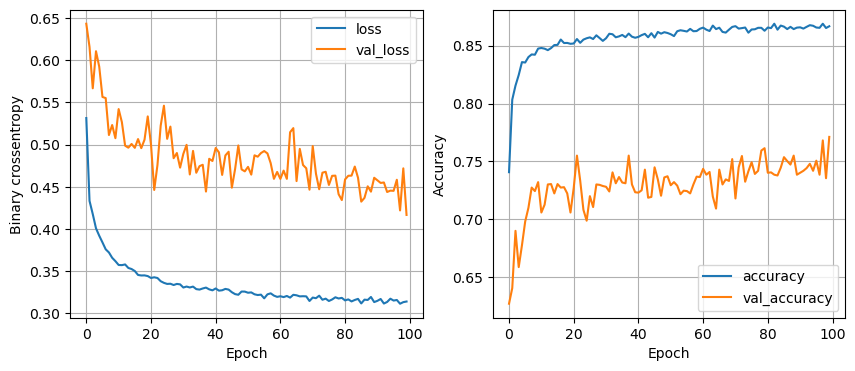

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3012
32nodes,dropout0.2,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5649 - loss: 0.6541 - val_accuracy: 0.5935 - val_loss: 0.6611
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.4586 - val_accuracy: 0.6114 - val_loss: 0.6492
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4435 - val_accuracy: 0.6245 - val_loss: 0.6447
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.4180 - val_accuracy: 0.6558 - val_loss: 0.6103
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.4148 - val_accuracy: 0.6622 - val_loss: 0.6074
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4173 - val_accuracy: 0.6470 - val_loss: 0.6366
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8263 - loss: 0.3988 - val_accuracy: 0.6686 - val_loss: 0.

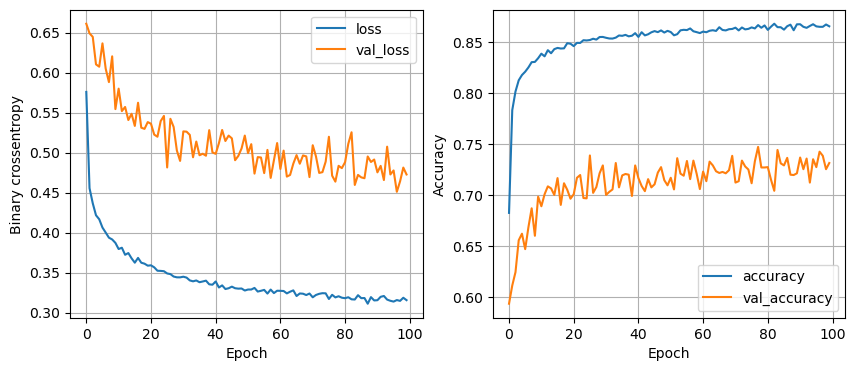

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.3021
64nodes,dropout0,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8012 - loss: 0.4340 - val_accuracy: 0.7164 - val_loss: 0.5466
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8531 - loss: 0.3496 - val_accuracy: 0.7308 - val_loss: 0.5345
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3397 - val_accuracy: 0.6787 - val_loss: 0.5036
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.3364 - val_accuracy: 0.7682 - val_loss: 0.4561
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8627 - loss: 0.3263 - val_accuracy: 0.6935 - val_loss: 0.5768
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3189 - val_accuracy: 0.7958 - val_loss: 0.3853
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.3090 - val_accuracy: 0.7362 - va

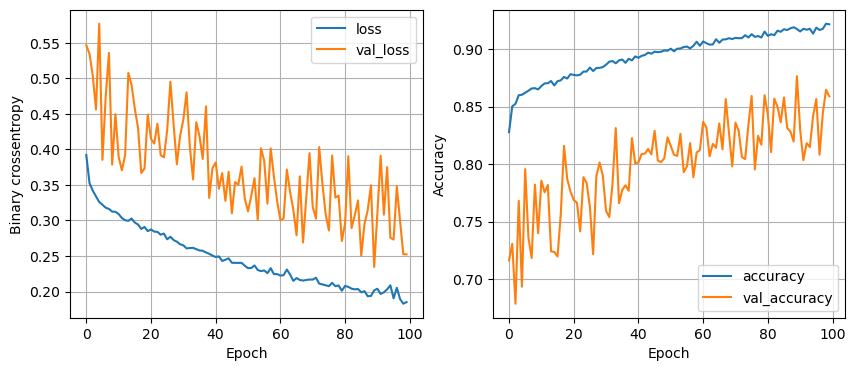

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.5083
64nodes,dropout0,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7943 - loss: 0.4375 - val_accuracy: 0.6218 - val_loss: 0.7129
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8490 - loss: 0.3524 - val_accuracy: 0.6548 - val_loss: 0.5735
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3271 - val_accuracy: 0.7288 - val_loss: 0.4752
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3352 - val_accuracy: 0.7264 - val_loss: 0.4689
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3202 - val_accuracy: 0.7419 - val_loss: 0.4437
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3165 - val_accuracy: 0.7406 - val_loss: 0.4373
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8756 - loss: 0.3001 - val_accuracy: 0.7769 - va

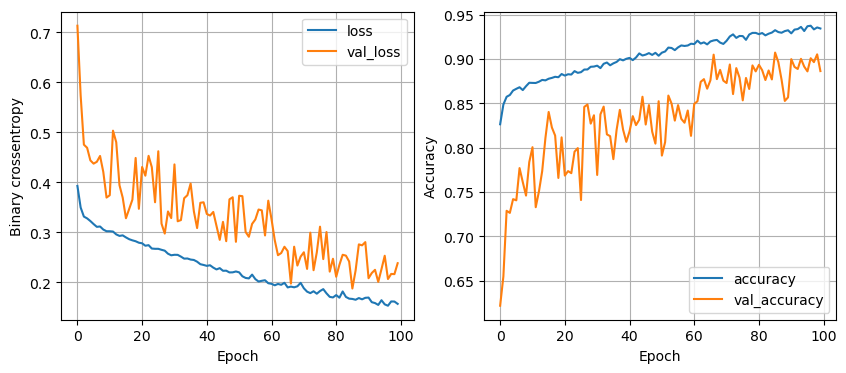

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.6047
64nodes,dropout0,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7718 - loss: 0.4536 - val_accuracy: 0.6908 - val_loss: 0.6228
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3615 - val_accuracy: 0.7513 - val_loss: 0.4887
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.3381 - val_accuracy: 0.7254 - val_loss: 0.5281
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.3352 - val_accuracy: 0.7816 - val_loss: 0.3992
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.3224 - val_accuracy: 0.8146 - val_loss: 0.3755
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.3128 - val_accuracy: 0.7550 - val_loss: 0.4553
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.3159 - val_accuracy: 0.7645 - val_loss: 0.459

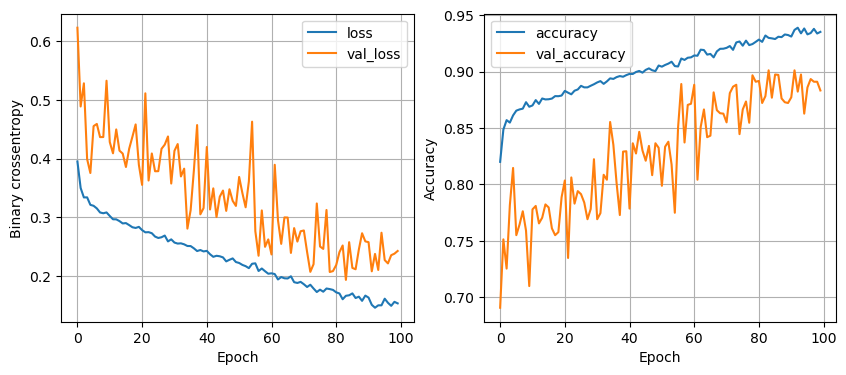

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.6305
64nodes,dropout0,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7907 - loss: 0.4448 - val_accuracy: 0.6894 - val_loss: 0.5319
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3502 - val_accuracy: 0.6861 - val_loss: 0.5447
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3346 - val_accuracy: 0.7439 - val_loss: 0.5165
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3275 - val_accuracy: 0.7537 - val_loss: 0.4296
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8629 - loss: 0.3238 - val_accuracy: 0.7419 - val_loss: 0.5137
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 0.3118 - val_accuracy: 0.7719 - val_loss: 0.4521
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3128 - val_accuracy: 0.7268 - v

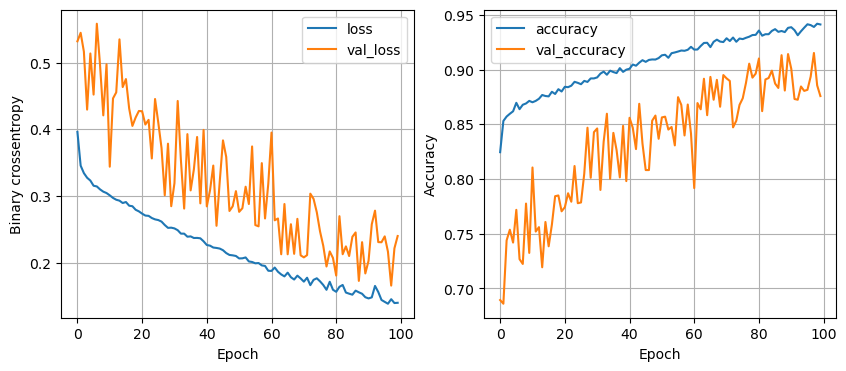

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.7305
64nodes,dropout0,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7914 - loss: 0.4510 - val_accuracy: 0.6521 - val_loss: 0.6429
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3566 - val_accuracy: 0.6978 - val_loss: 0.5620
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3395 - val_accuracy: 0.7281 - val_loss: 0.4942
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3348 - val_accuracy: 0.7386 - val_loss: 0.4695
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3190 - val_accuracy: 0.7524 - val_loss: 0.4580
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - loss: 0.3137 - val_accuracy: 0.7460 - val_loss: 0.4660
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.3056 - val_accuracy: 0.7773 - v

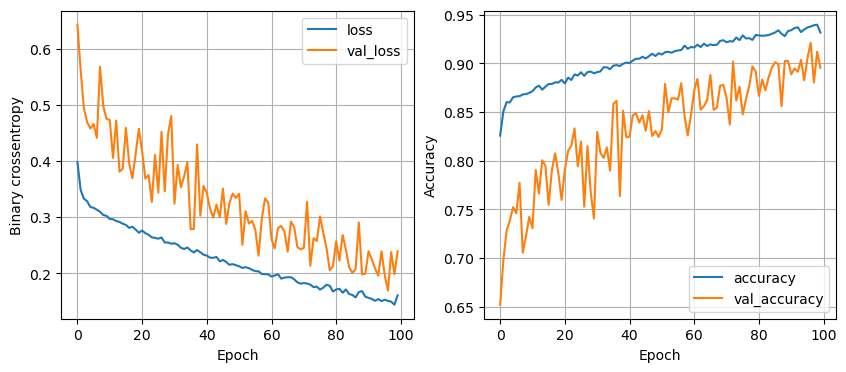

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.5751
64nodes,dropout0,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7687 - loss: 0.4818 - val_accuracy: 0.7456 - val_loss: 0.5165
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 0.3542 - val_accuracy: 0.7910 - val_loss: 0.4209
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.3455 - val_accuracy: 0.7110 - val_loss: 0.5082
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.3354 - val_accuracy: 0.7567 - val_loss: 0.4467
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.3298 - val_accuracy: 0.7648 - val_loss: 0.4144
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3161 - val_accuracy: 0.7873 - val_loss: 0.4052
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.3151 - val_accuracy: 0.7248 - val_loss: 0.52

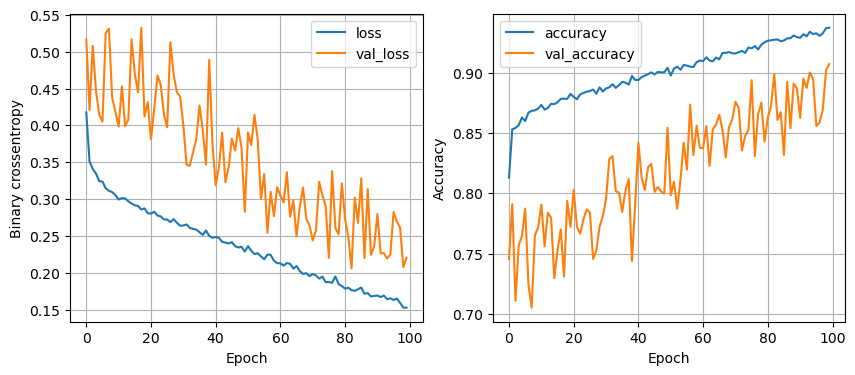

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.4869
64nodes,dropout0,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7674 - loss: 0.4890 - val_accuracy: 0.6555 - val_loss: 0.6223
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3713 - val_accuracy: 0.6777 - val_loss: 0.6323
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3440 - val_accuracy: 0.7725 - val_loss: 0.4450
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.3378 - val_accuracy: 0.6894 - val_loss: 0.5754
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.3313 - val_accuracy: 0.7789 - val_loss: 0.4129
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.3171 - val_accuracy: 0.7476 - val_loss: 0.4723
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3155 - val_accuracy: 0.7288 - v

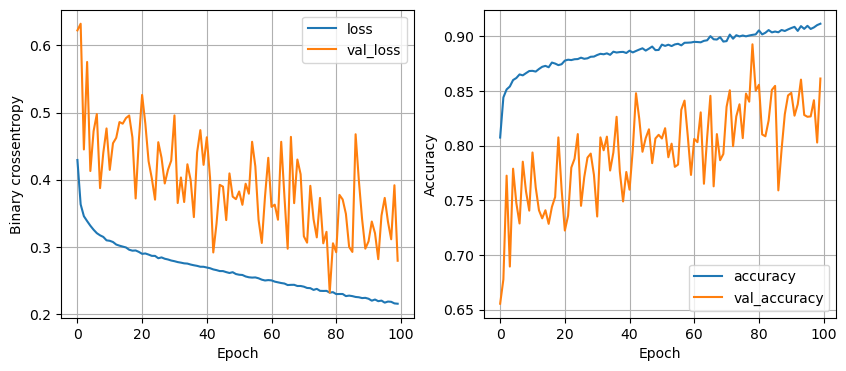

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3483
64nodes,dropout0,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7383 - loss: 0.5270 - val_accuracy: 0.6359 - val_loss: 0.6363
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.3786 - val_accuracy: 0.6834 - val_loss: 0.6047
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3516 - val_accuracy: 0.7476 - val_loss: 0.4820
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3428 - val_accuracy: 0.7214 - val_loss: 0.5325
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8580 - loss: 0.3349 - val_accuracy: 0.7349 - val_loss: 0.5089
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3280 - val_accuracy: 0.7382 - val_loss: 0.4978
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3378 - val_accuracy: 0.7376 - v

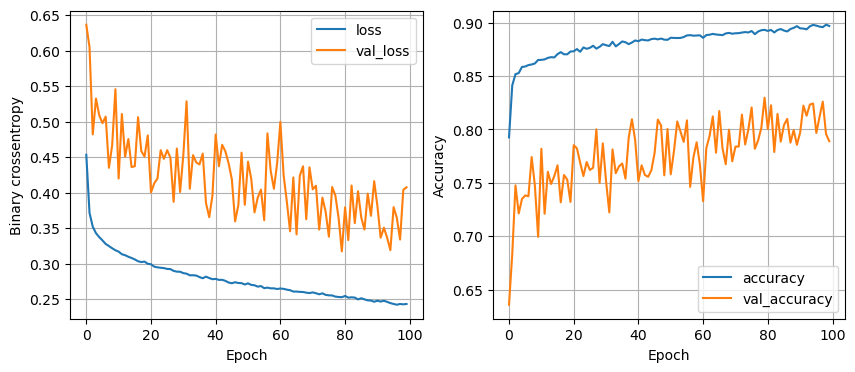

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.3211
64nodes,dropout0,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7305 - loss: 0.5495 - val_accuracy: 0.6245 - val_loss: 0.6204
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8248 - loss: 0.4003 - val_accuracy: 0.6989 - val_loss: 0.5606
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3669 - val_accuracy: 0.6746 - val_loss: 0.6185
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8441 - loss: 0.3627 - val_accuracy: 0.7456 - val_loss: 0.5141
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.3486 - val_accuracy: 0.7443 - val_loss: 0.4984
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3434 - val_accuracy: 0.7678 - val_loss: 0.4759
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8551 - loss: 0.3406 - val_accuracy: 0.7608 - val_loss: 0.46

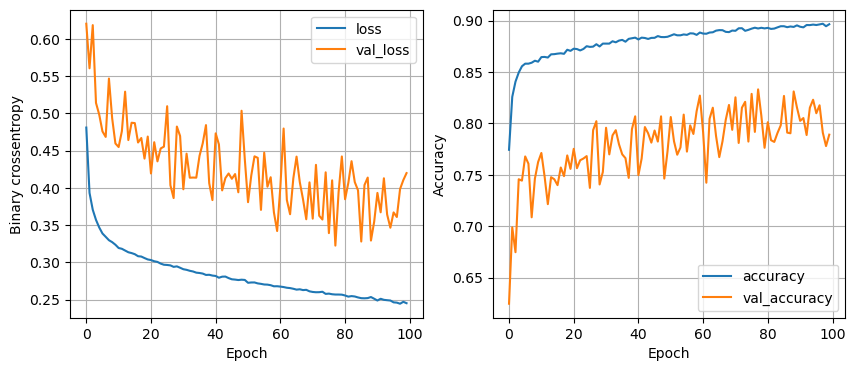

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.3091
64nodes,dropout0.2,lr0.01,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7851 - loss: 0.4559 - val_accuracy: 0.7396 - val_loss: 0.5169
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.3713 - val_accuracy: 0.6941 - val_loss: 0.5223
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8442 - loss: 0.3630 - val_accuracy: 0.7419 - val_loss: 0.4668
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.3548 - val_accuracy: 0.7315 - val_loss: 0.4667
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.3442 - val_accuracy: 0.6817 - val_loss: 0.5665
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8519 - loss: 0.3487 - val_accuracy: 0.7335 - val_loss: 0.4848
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.3592 - val_accuracy: 0.7197 - 

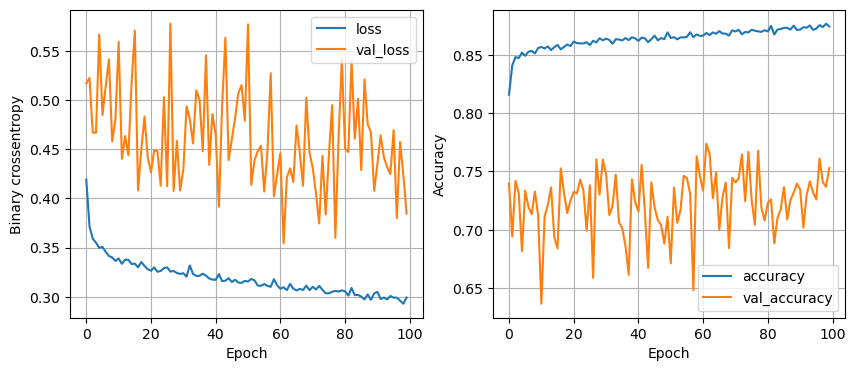

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3053
64nodes,dropout0.2,lr0.01,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7901 - loss: 0.4580 - val_accuracy: 0.7392 - val_loss: 0.5129
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.3648 - val_accuracy: 0.6857 - val_loss: 0.5758
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.3658 - val_accuracy: 0.7298 - val_loss: 0.5051
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3522 - val_accuracy: 0.7635 - val_loss: 0.4420
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.3451 - val_accuracy: 0.7238 - val_loss: 0.4492
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3439 - val_accuracy: 0.7244 - val_loss: 0.4998
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3379 - val_accuracy: 0.7059 - 

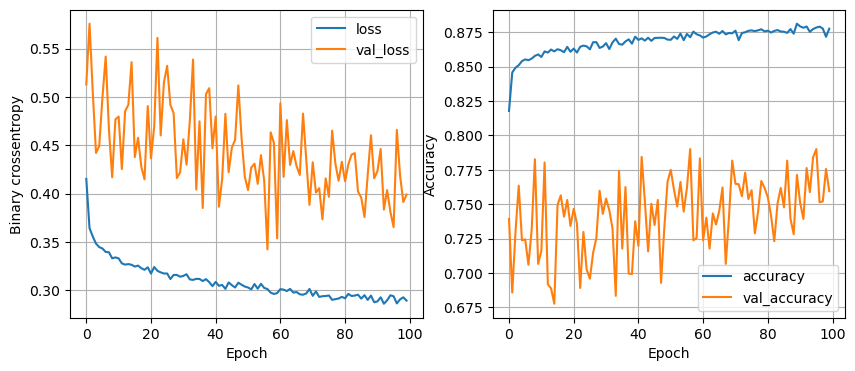

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2956
64nodes,dropout0.2,lr0.01,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7772 - loss: 0.4672 - val_accuracy: 0.8122 - val_loss: 0.4106
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.3732 - val_accuracy: 0.6901 - val_loss: 0.5241
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.3530 - val_accuracy: 0.6992 - val_loss: 0.5580
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8458 - loss: 0.3620 - val_accuracy: 0.6972 - val_loss: 0.5760
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.3452 - val_accuracy: 0.7466 - val_loss: 0.4801
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8596 - loss: 0.3368 - val_accuracy: 0.7456 - val_loss: 0.4639
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3313 - val_accuracy: 0.7702 - val_loss: 0.4

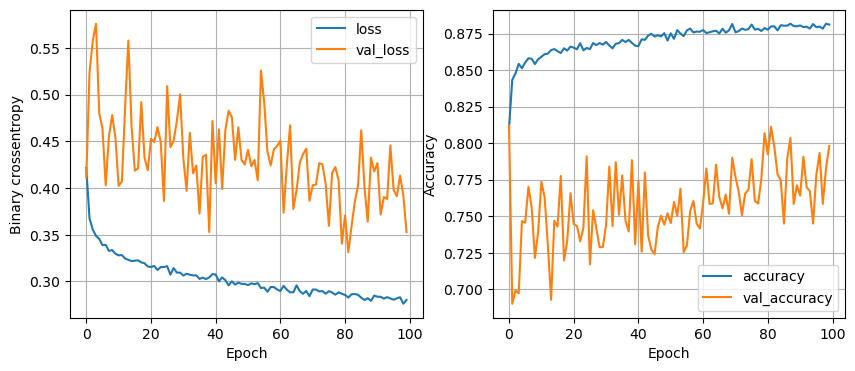

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8831 - loss: 0.2999
64nodes,dropout0.2,lr0.005,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7706 - loss: 0.4732 - val_accuracy: 0.6817 - val_loss: 0.6074
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3703 - val_accuracy: 0.6851 - val_loss: 0.5878
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3549 - val_accuracy: 0.6477 - val_loss: 0.6220
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3454 - val_accuracy: 0.7402 - val_loss: 0.4808
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3465 - val_accuracy: 0.7201 - val_loss: 0.4784
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8531 - loss: 0.3413 - val_accuracy: 0.6854 - val_loss: 0.5295
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3295 - val_accuracy: 0.6803 -

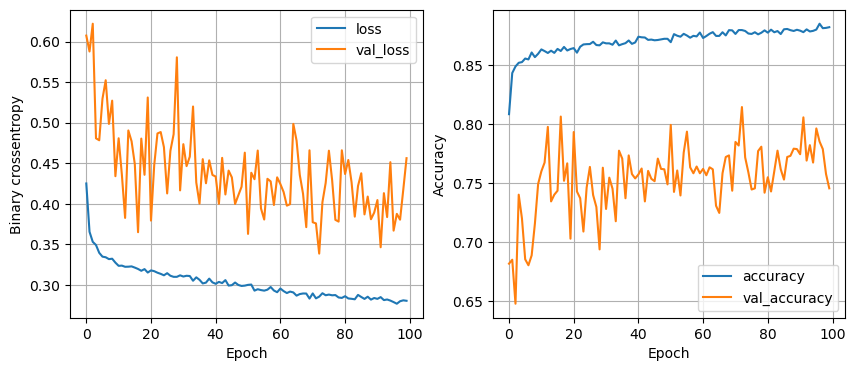

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3131
64nodes,dropout0.2,lr0.005,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7843 - loss: 0.4618 - val_accuracy: 0.7312 - val_loss: 0.5408
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3694 - val_accuracy: 0.6770 - val_loss: 0.5975
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3526 - val_accuracy: 0.6746 - val_loss: 0.5260
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3578 - val_accuracy: 0.6662 - val_loss: 0.6050
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3398 - val_accuracy: 0.7456 - val_loss: 0.4882
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3485 - val_accuracy: 0.6992 - val_loss: 0.5198
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3295 - val_accuracy: 0.6814 -

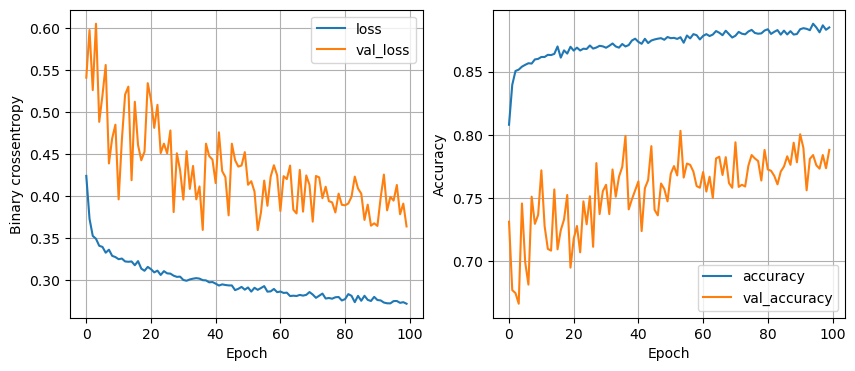

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.2974
64nodes,dropout0.2,lr0.005,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7684 - loss: 0.4867 - val_accuracy: 0.7133 - val_loss: 0.5331
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8322 - loss: 0.3865 - val_accuracy: 0.6982 - val_loss: 0.5566
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.3586 - val_accuracy: 0.7248 - val_loss: 0.5185
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.3476 - val_accuracy: 0.6925 - val_loss: 0.5369
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8526 - loss: 0.3451 - val_accuracy: 0.7779 - val_loss: 0.4032
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.3419 - val_accuracy: 0.7110 - val_loss: 0.4810
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.3420 - val_accuracy: 0.6524 - val_loss: 0.

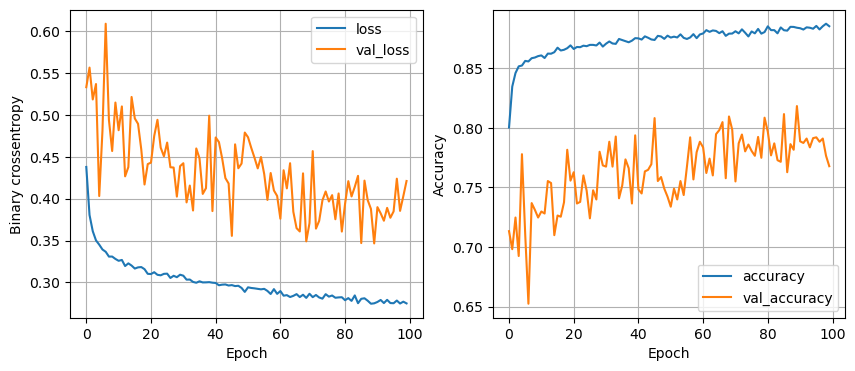

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.2951
64nodes,dropout0.2,lr0.001,batch size32
Epoch 1/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7244 - loss: 0.5175 - val_accuracy: 0.6706 - val_loss: 0.6052
Epoch 2/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.4026 - val_accuracy: 0.7029 - val_loss: 0.5743
Epoch 3/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.3887 - val_accuracy: 0.7688 - val_loss: 0.4687
Epoch 4/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8422 - loss: 0.3744 - val_accuracy: 0.7100 - val_loss: 0.5488
Epoch 5/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3688 - val_accuracy: 0.6995 - val_loss: 0.5540
Epoch 6/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3594 - val_accuracy: 0.7164 - val_loss: 0.5218
Epoch 7/100
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.3480 - val_accuracy: 0.7241 -

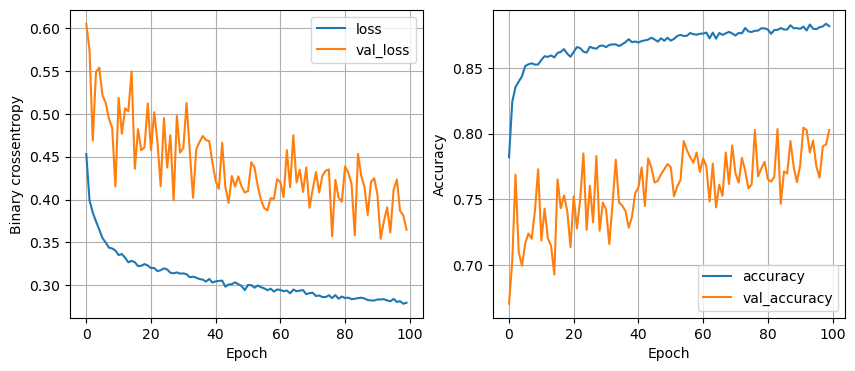

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.2911
64nodes,dropout0.2,lr0.001,batch size64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7192 - loss: 0.5422 - val_accuracy: 0.6329 - val_loss: 0.6362
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8162 - loss: 0.4114 - val_accuracy: 0.7015 - val_loss: 0.5684
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8304 - loss: 0.3887 - val_accuracy: 0.6955 - val_loss: 0.5866
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 0.3755 - val_accuracy: 0.7103 - val_loss: 0.5718
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.3755 - val_accuracy: 0.7090 - val_loss: 0.5455
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.3594 - val_accuracy: 0.7318 - val_loss: 0.5073
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.3486 - val_accuracy: 0.7167 -

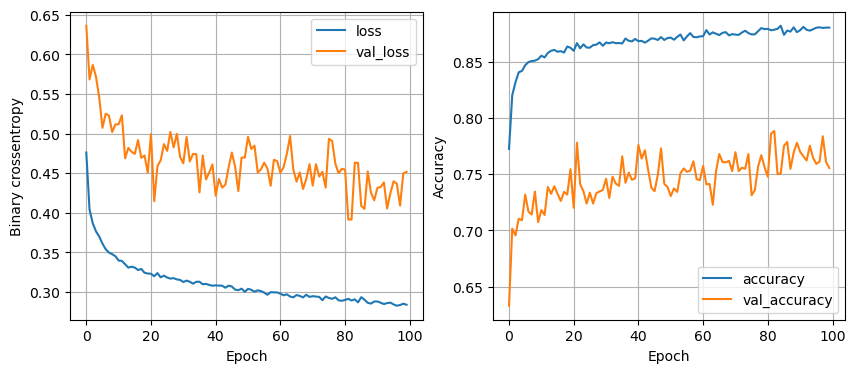

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.2905
64nodes,dropout0.2,lr0.001,batch size128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6678 - loss: 0.5920 - val_accuracy: 0.5801 - val_loss: 0.6791
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4300 - val_accuracy: 0.6534 - val_loss: 0.6106
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.3997 - val_accuracy: 0.6941 - val_loss: 0.5714
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8295 - loss: 0.3921 - val_accuracy: 0.7059 - val_loss: 0.5736
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3826 - val_accuracy: 0.7379 - val_loss: 0.5307
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.3667 - val_accuracy: 0.7227 - val_loss: 0.5498
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.3708 - val_accuracy: 0.7164 - val_loss: 0.

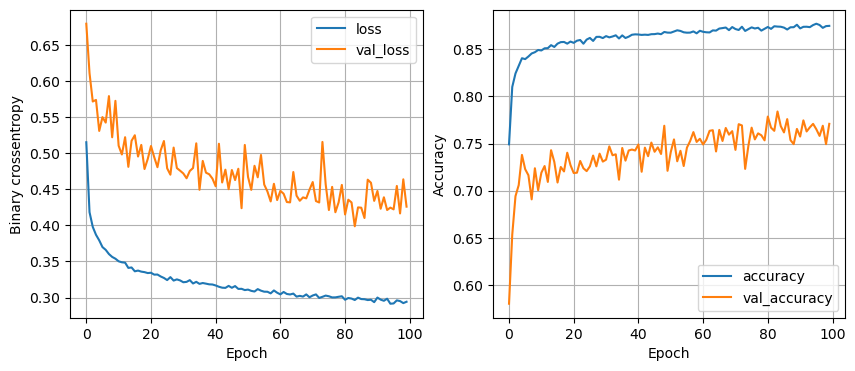

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.2961


In [ ]:
least_val_loss =float('inf')
least_loss_model = None
epochs=100
for num_nodes in[16,32,64]:
    for dropout_prob in[0,0.2]:
        for lr in[0.01,0.005,0.001]:
            for batch_size in[32,64,128]:
                print(f"{num_nodes}nodes,dropout{dropout_prob},lr{lr},batch size{batch_size}")
                model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
# 64 dakikada yaptı  54 tane sonuç çıkarttı

In [54]:
least_loss_model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.5662370e-02],
       [3.5382271e-08],
       [9.0033376e-01],
       ...,
       [9.8520809e-01],
       [7.7041280e-01],
       [9.2434311e-01]], dtype=float32)

In [55]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 0, 1, ..., 1, 1, 1])

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1329
           1       0.88      0.93      0.90      2475

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



Linear Regression anlatıldı